In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import sys
sys.path.append("../")

In [2]:
from typing import Tuple

from itertools import groupby

import pandas as pd
import altair as alt
import numpy as np
import matplotlib.pyplot as plt

import errudite
from errudite.io import DatasetReader
from errudite.builts import Attribute, Group
from errudite.targets import Instance

from tacrev.readers.tacred import load_tacred
from tacrev.readers.evaluation_results import load_evaluation_results
from tacrev.writers.writer_utils import results_as_dataframe, documents_as_dataframe

from tacrev.analysis.errudite.utils import set_predictions_from_df

INFO:errudite.build_blocks.wrapper:Parsed: FuncOp(LABEL):[ArgOp:groundtruth]+[]
INFO:errudite.builts.attribute:Created attr: gt
INFO:errudite.build_blocks.wrapper:Parsed: FuncOp(LABEL):[ArgOp:groundtruth]+[]
INFO:errudite.builts.attribute:Found an existing attribute: LABEL(groundtruth)
INFO:errudite.builts.attribute:Created attr: groundtruth_label
INFO:errudite.build_blocks.wrapper:Parsed: FuncOp(ARG_TYPES_COARSE):[ArgOp:FuncOp(LABEL):[ArgOp:groundtruth]+[]]+[]
INFO:errudite.builts.attribute:Created attr: arg_types_coarse
INFO:errudite.build_blocks.wrapper:Parsed: FuncOp(ARG_TYPES_COARSE_FIRST):[ArgOp:FuncOp(LABEL):[ArgOp:groundtruth]+[]]+[]
INFO:errudite.builts.attribute:Created attr: arg_type_coarse_first
INFO:errudite.build_blocks.wrapper:Parsed: FuncOp(ARG_TYPES_COARSE_SECOND):[ArgOp:FuncOp(LABEL):[ArgOp:groundtruth]+[]]+[]
INFO:errudite.builts.attribute:Created attr: arg_type_coarse_second
INFO:errudite.build_blocks.wrapper:Parsed: FuncOp(ARG_TYPES_FINE):[ArgOp:FuncOp(LABEL):[ArgO

In [3]:
DATASET_PATH = "../dataset/test_rev.json"
MODEL_RESULTS_PATH = "../results/test_results/"


MODELS_UNDER_INVESTIGATION = [
    "cnn_wo_discr_masked",
    "tre_tacred",
    "spanbert_tacred",
    "knowbert_wordnet_wiki_tacred"
]

In [4]:
reader = DatasetReader.by_name("tacred")()
instances = reader.read(DATASET_PATH)

documents = load_tacred(DATASET_PATH)
documents_df = documents_as_dataframe(documents, mark_arguments=True)
evaluation_results = results_as_dataframe(load_evaluation_results(MODEL_RESULTS_PATH, documents))
combined_df = pd.merge(documents_df, evaluation_results, left_index=True, right_index=True)

set_predictions_from_df(instances, combined_df)

instance_hash, instance_hash_rewritten, qid_hash = Instance.build_instance_hashes(instances)

INFO:errudite.utils.file_utils:Errudite cache folder selected: ./caches/
INFO:errudite.io.dataset_reader:Reading instances from lines in file at: ../dataset/test_rev.json
INFO:errudite.io.tacred_reader:Reading instances from lines in file at: ../dataset/test_rev.json
INFO:errudite.io.tacred_reader:Reading TACRED instances from json dataset at: ../dataset/test_rev.json


In [5]:
Group.create(
    name="all",
    description="",
    cmd="",
    attr_hash=Attribute.store_hash(),
    group_hash=Group.store_hash()
)

Group.create(
    name="per:*",
    description="",
    cmd="attr:coarse_subj_type == 'PERSON'",
    attr_hash=Attribute.store_hash(),
    group_hash=Group.store_hash()
)

Group.create(
    name="*:loc",
    description="",
    cmd="attr:coarse_obj_type == 'LOCATION'",
    attr_hash=Attribute.store_hash(),
    group_hash=Group.store_hash()
)

Group.create(
    name="per:loc",
    description="",
    cmd="attr:coarse_subj_type == 'PERSON' and attr:coarse_obj_type == 'LOCATION'",
    attr_hash=Attribute.store_hash(),
    group_hash=Group.store_hash()
)

Group.create(
    name="org:loc",
    description="",
    cmd="attr:coarse_subj_type == 'ORGANIZATION' and attr:coarse_obj_type == 'LOCATION'",
    attr_hash=Attribute.store_hash(),
    group_hash=Group.store_hash()
)

Group.create(
    name="org:*",
    description="",
    cmd="attr:coarse_subj_type == 'ORGANIZATION'",
    attr_hash=Attribute.store_hash(),
    group_hash=Group.store_hash()
)

Group.create(
    name="same_nertag",
    description="",
    cmd="attr:coarse_subj_type == attr:coarse_obj_type",
    attr_hash=Attribute.store_hash(),
    group_hash=Group.store_hash()
)

Group.create(
    name="ner(H)!=ner(T)",
    description="",
    cmd="attr:coarse_subj_type != attr:coarse_obj_type",
    attr_hash=Attribute.store_hash(),
    group_hash=Group.store_hash()
)

Group.create(
    name="has_coref",
    description="",
    cmd="attr:pos_head == PRP or attr:pos_head == 'PRP$' or attr:pos_tail == PRP or attr:pos_tail == 'PRP$'",
    attr_hash=Attribute.store_hash(),
    group_hash=Group.store_hash()
)

Group.create(
    name="sentlen>30",
    description="",
    cmd="attr:sentence_length > 30",
    attr_hash=Attribute.store_hash(),
    group_hash=Group.store_hash()
)

Group.create(
    name="count(entities)>5",
    description="",
    cmd="attr:count_entity_in_context > 5",
    attr_hash=Attribute.store_hash(),
    group_hash=Group.store_hash()
)

Group.create(
    name="has_distractor",
    description="",
    cmd="attr:num_distractor_between_arguments > 0",
    attr_hash=Attribute.store_hash(),
    group_hash=Group.store_hash()
)

Group.create(
    name="has_inverse",
    description="",
    cmd="attr:has_inverse_relation == True",
    attr_hash=Attribute.store_hash(),
    group_hash=Group.store_hash()
)

Group.create(
    name="argdist=1",
    description="",
    cmd="attr:argument_distance == 1",
    attr_hash=Attribute.store_hash(),
    group_hash=Group.store_hash()
)

Group.create(
    name="argdist<3",
    description="",
    cmd="attr:argument_distance < 3",
    attr_hash=Attribute.store_hash(),
    group_hash=Group.store_hash()
)

Group.create(
    name="argdist>10",
    description="",
    cmd="attr:argument_distance > 10",
    attr_hash=Attribute.store_hash(),
    group_hash=Group.store_hash()
)

Group.create(
    name="argdist>20",
    description="",
    cmd="attr:argument_distance > 20",
    attr_hash=Attribute.store_hash(),
    group_hash=Group.store_hash()
)

Group.create(
    name="negative",
    description="",
    cmd="attr:groundtruth_label == 'no_relation'",
    attr_hash=Attribute.store_hash(),
    group_hash=Group.store_hash()
)

Group.create(
    name="positive",
    description="",
    cmd="attr:groundtruth_label != 'no_relation'",
    attr_hash=Attribute.store_hash(),
    group_hash=Group.store_hash()
)

Group.create(
    name="same_nertag&positive",
    description="",
    cmd="attr:groundtruth_label != 'no_relation' and attr:coarse_subj_type == attr:coarse_obj_type",
    attr_hash=Attribute.store_hash(),
    group_hash=Group.store_hash()
)

INFO:errudite.build_blocks.wrapper:Parsed: True
INFO:errudite.builts.group:Created group: all
INFO:errudite.build_blocks.wrapper:Parsed: [BinOp](==):[[BuildBlockOp](attr):coarse_subj_type, 'PERSON']
INFO:errudite.builts.group:Created group: per:*
INFO:errudite.build_blocks.wrapper:Parsed: [BinOp](==):[[BuildBlockOp](attr):coarse_obj_type, 'LOCATION']
INFO:errudite.builts.group:Created group: *:loc
INFO:errudite.build_blocks.wrapper:Parsed: [BinOp](and):[[BinOp](==):[[BuildBlockOp](attr):coarse_subj_type, 'PERSON'], [BinOp](==):[[BuildBlockOp](attr):coarse_obj_type, 'LOCATION']]
INFO:errudite.builts.group:Created group: per:loc
INFO:errudite.build_blocks.wrapper:Parsed: [BinOp](and):[[BinOp](==):[[BuildBlockOp](attr):coarse_subj_type, 'ORGANIZATION'], [BinOp](==):[[BuildBlockOp](attr):coarse_obj_type, 'LOCATION']]
INFO:errudite.builts.group:Created group: org:loc
INFO:errudite.build_blocks.wrapper:Parsed: [BinOp](==):[[BuildBlockOp](attr):coarse_subj_type, 'ORGANIZATION']
INFO:errudite.

[Group](same_nertag&positive): 
	CMD	: attr:groundtruth_label != 'no_relation' and attr:coarse_subj_type == attr:coarse_obj_type
	COUNT	: 638

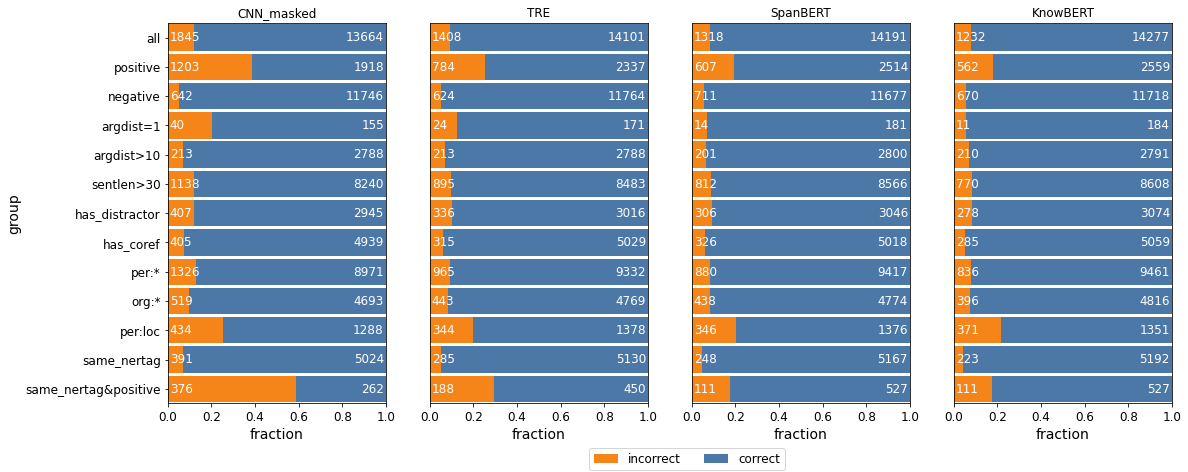

In [6]:
all_groups = ["all", "positive", "negative", 
              "argdist=1", "argdist>10", "sentlen>30",  
              "has_distractor", "has_coref",
              "per:*", "org:*", "per:loc",
              "same_nertag", "same_nertag&positive"]
all_groups.reverse()
model_titles = {"tre_tacred":"TRE", "knowbert_wordnet_wiki_tacred":"KnowBERT", "cnn_wo_discr_masked": "CNN, masked", "spanbert_tacred":"SpanBERT"}
chart_list = []
import numpy as np
import matplotlib.pyplot as plt

plt.rc('axes', labelsize=14) 
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
category_names = ['incorrect', 'correct']
category_colors = ['#f58518', '#4c78a8']
fig, axes_i = plt.subplots(1, 4, figsize=(18, 7))
for (i, model) in enumerate(MODELS_UNDER_INVESTIGATION):
    group_stats = []
    for group_name in all_groups:
        group = Group.get(group_name)
        stats = Group.eval_stats(group.get_instance_list(), model=model)
        group_stats.append({
            "count": [stats['counts']["incorrect"],stats['counts']['correct']],
            "normalized_count": [stats['counts']["incorrect"] / float(stats['counts']['correct'] + stats['counts']['incorrect']), 
                                 stats['counts']["correct"] / float(stats['counts']['correct'] + stats['counts']['incorrect'])],
            "group": group_name
        })
    
    labels = [g["group"] for g in group_stats]
    
    data = np.array([g["normalized_count"] for g in group_stats])
    texts = np.array([g["count"] for g in group_stats])
    data_cum = data.cumsum(axis=1)
    
    if i > 0:
        axes_i[i].yaxis.set_visible(False)
    axes_i[i].set_ylabel('group')
        
    axes_i[i].set_xlim(0, np.sum(data, axis=1).max())
    axes_i[i].set_ylim(-0.5, len(data) - 0.5)
    axes_i[i].set_xlabel('fraction')
    
    for j, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, j]
        barlabels = texts[:, j]
        starts = data_cum[:, j] - widths
        axes_i[i].barh(labels, widths, left=starts, height=0.9,
                label=colname, color=color)
        xcenters = [0.01] * len(starts) if j == 0 else [0.99] * len(starts) 
        text_color = 'white'
        for y, (x, c) in enumerate(zip(xcenters, barlabels)):
            axes_i[i].text(x, y, str(int(c)), ha='left' if j == 0 else 'right', va='center',
                    color=text_color, fontsize=12)
    axes_i[i].set_title(model_titles[model])
    if i == len(MODELS_UNDER_INVESTIGATION) - 1: # last axes
        handles, labels = axes_i[i].get_legend_handles_labels()
        fig.legend(handles, labels, ncol=2, loc='upper center', bbox_to_anchor=(0.53, 0.06), fontsize='large')

#plt.savefig(FIG_PATH, dpi=300, bbox_inches='tight')
plt.show()